### PREPROCESSING

+ Very Important Concept in ML Model Development.
+ The idea of ML algorithm is basically comes from Gradient Descent.
+ So, Data Preprocessing plays a huge role in it.
+ Gradient Descent is to find the fit line for a model when we have a low error wrt to the real and predicted data points.
+ So with Preprocessing the data it can be achieved.
+ And without Preprocessing we can't achieve the Global Minimum.
+ Check the two Comparison given below.

**Looking at Data Preprocessing. They are four types.**

    1. Standardization / Mean Removal.
    2. Min - Max Scaling / Scaling Features to a Range.
    3. Normalization
    4. Binarization.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

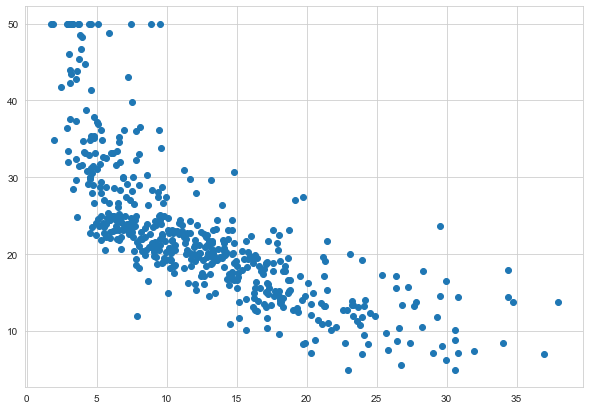

In [7]:
## fetch the data
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()


X = df[['LSTAT']].values
y = boston_data.target

plt.figure(figsize=(10,7))
plt.scatter(X, y);

WITHOUT PREPROCESSING

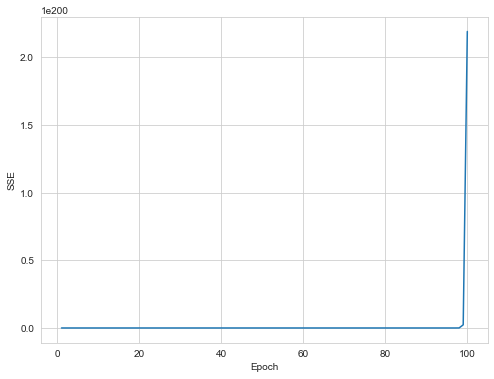

In [8]:
## with out preprocessing
alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)
    
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');    

WITH PREPROCESSING

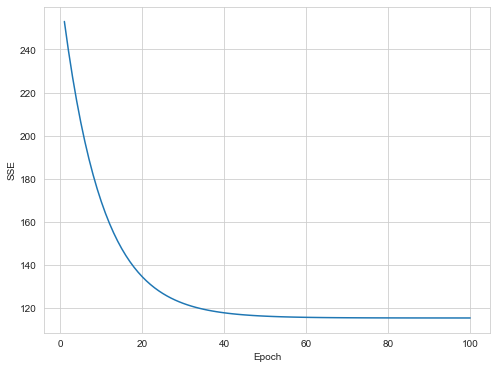

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');  

BEFORE SCALING THE ATTRIBUTES

+ The X data points distributed from -40 to +40
+ Here it is not Normally Distributed.

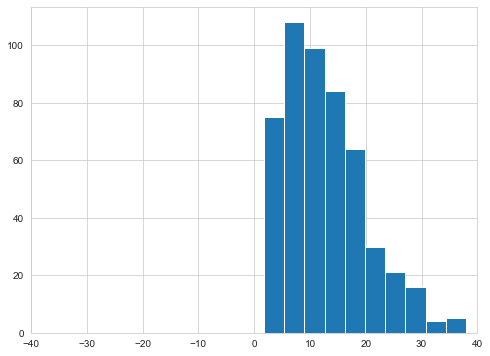

In [10]:
plt.figure(figsize=(8,6))
plt.hist(X);
plt.xlim(-40, 40);

AFTER SCALING

+ The data points are distributed from -4 to 4.
+ It is now Normally Distributed.

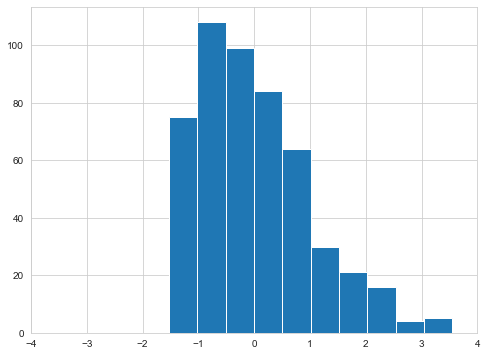

In [11]:
plt.figure(figsize=(8,6))
plt.hist(X_std);
plt.xlim(-4, 4);

### Preprocessing Methods

#### 1. Standardization / Mean Removal / Variance Scaling

+ Mean is Removed, Data is Centered on Zero, This is to Remove Bias.
+ Here mean Zero, Standard Deviation is 1.

In [12]:
from sklearn import preprocessing

X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                   [ 0.,  1., -1.]])

X_train.mean(axis = 0)   ## axis = 0 means --> along columns or vertical

array([1.        , 0.        , 0.33333333])

In [13]:
array = np.array([  [10,5,7],
                    [0,10,14],
                    [20,15,21]])
array.mean(axis = 0) 

array([10., 10., 14.])

In [14]:
## doing the preprocessing
X_scaled = preprocessing.scale(X_train)
X_scaled
print("Mean of the Scaled Array :--", X_scaled.mean(axis=0))
print("Standard Deviation of the Scaled Array :--", X_scaled.std(axis=0))

Mean of the Scaled Array :-- [0. 0. 0.]
Standard Deviation of the Scaled Array :-- [1. 1. 1.]


Mean of the array :- [1.         0.         0.33333333]
Scale of the array :- [0.81649658 0.81649658 1.24721913]
Transformed test Set :-- [[-2.44948974  1.22474487 -0.26726124]]


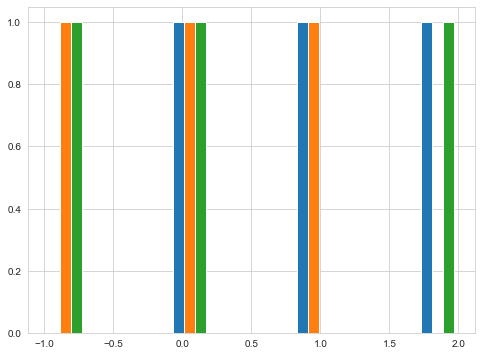

In [15]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
print("Mean of the array :-", scaler.mean_)
print("Scale of the array :-", scaler.scale_)
## then transform
scaler.transform(X_train)

## plot the data.
plt.figure(figsize=(8,6))
plt.hist(X_train);

## using the transform for the new test data
X_test = [[-1., 1., 0.]]
print("Transformed test Set :--",scaler.transform(X_test))

#### 2.Min-Max Scaler

+ Here the data is scaled to range of `0 - 1`

In [30]:
from sklearn.preprocessing import MinMaxScaler

X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                   [ 0.,  1., -1.]])

X_train.mean(axis = 0)   ## axis = 0 means --> along columns or vertical

minmax_scaler = preprocessing.MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
print(X_train_minmax)

## X_test value
X_test = np.array([[-3., -1.,  0.], [2., 1.5, 4.]])
X_test_minmax = minmax_scaler.transform(X_test)
print(X_test_minmax)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
[[-1.5         0.          0.33333333]
 [ 1.          1.25        1.66666667]]


#### 3. MaxAbsScaler

+ This works in a very Similar Fashion.
+ But the data will be scaled to range of `[-1 - 1]`

In [44]:
from sklearn.preprocessing import MaxAbsScaler

X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                   [ 0.,  1., -1.]])

X_train.mean(axis = 0)   ## axis = 0 means --> along columns or vertical

## initiate the MaxAbsScaler
maxabsscaler = preprocessing.MaxAbsScaler()
X_train_scaled = maxabsscaler.fit_transform(X_train)
print(X_train_scaled)

## prepare the X_test
X_test = np.array([[ -1., -0.5,  2.], [0., 0.5, -0.6]])
X_test_scaled = maxabsscaler.transform(X_test)
print(X_test_scaled)

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
[[-0.5 -0.5  1. ]
 [ 0.   0.5 -0.3]]


#### 4. Normalization

+ Process of Scaling Individual Samples to have unit Norm.

Two types of Normalizations

    + l1 Normalization :- Least Absolute Deviations, sum of absolute values in each row will be 1
    
    + l2 Normalization :- Least Squares, sum of all squares will be 1.

In [50]:
from sklearn.preprocessing import Normalizer

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

print(X_normalized)

normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

print(normalizer.transform(X))

print(normalizer.transform([[-1.,  1., 0.]]))

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[-0.70710678  0.70710678  0.        ]]


In [51]:
## l1 normalization
from sklearn.preprocessing import Normalizer

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l1')

print(X_normalized)

normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

print(normalizer.transform(X))

print(normalizer.transform([[-1.,  1., 0.]]))

[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[-0.70710678  0.70710678  0.        ]]


#### 5. Binarization

+ Feature binarization is the process of thresholding numerical features to get boolean values

In [60]:
from sklearn.preprocessing import Binarizer

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
print(binarizer)

print(binarizer.transform(X))

## using a threshold
binarizer = preprocessing.Binarizer(threshold=-0.5)
print(binarizer.transform(X))

Binarizer()
[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[1. 0. 1.]
 [1. 1. 1.]
 [1. 1. 0.]]


#### 6. LabelEncoder :-- Categorical Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

## lets consider these are the categories in the dataset
source = ['australia', 'singapore', 'new zealand', 'hong kong']
print(source)

label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)
print(src)

## here
## australia -- 0
## singapore -- 3
## new zealand -- 2
## hong kong -- 1

print("country to code mapping:\n") 
for k, v in enumerate(label_enc.classes_): 
    print(v,'\t', k) 
    
## implementing the test data
test_data = ['hong kong', 'singapore', 'australia', 'new zealand']
result = label_enc.transform(test_data) 
print(result)

['australia', 'singapore', 'new zealand', 'hong kong']
[0 3 2 1]
country to code mapping:

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3
[1 3 0 2]


#### 7. OneHotEncoder - Categorical Encoding

In [71]:
from sklearn.preprocessing import OneHotEncoder

## source 
print(source)
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')
src = src.reshape(len(src), 1)
print(src)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

['australia', 'singapore', 'new zealand', 'hong kong']
[[0]
 [3]
 [2]
 [1]]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
